**below code is for importing dataset from kaggle to colab.**

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**above code is for importing dataset from kaggle to colab.**

In [15]:
import tensorflow
from tensorflow import keras

In [16]:
from keras.preprocessing.image import ImageDataGenerator
train_valid_test_generator=ImageDataGenerator(rescale=1./255.0,
                                         validation_split=0.2)

#rescalling and validation split setting

In [17]:
train_data=train_valid_test_generator.flow_from_directory(directory='/content/train',
                                                     class_mode='binary',
                                                     color_mode='rgb',
                                                     target_size=(256,256),
                                                     batch_size=128,
                                                     subset='training',
                                                     shuffle=False)

validation_data=train_valid_test_generator.flow_from_directory(directory='/content/train',
                                                                class_mode='binary',
                                                                color_mode='rgb',
                                                                target_size=(256,256),
                                                                batch_size=32,
                                                                subset='validation',
                                                                shuffle=False)

test_data=train_valid_test_generator.flow_from_directory(directory='/content/test',
                                                         class_mode='binary',
                                                         color_mode='rgb',
                                                         target_size=(256,256))

#initiating hyperperameters

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
from keras import Sequential
from keras.layers import Conv2D,AveragePooling2D,Flatten,Dense

#importing layers

In [19]:
model=Sequential()

model.add(Conv2D(filters=6,kernel_size=5,strides=1,padding='valid',activation='tanh',input_shape=(256,256,3)))
model.add(AveragePooling2D(pool_size=2,strides=2,padding='valid'))

model.add(Conv2D(filters=16,kernel_size=5,strides=1,padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=2,strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(units=120,activation='tanh'))
model.add(Dense(units=84,activation='tanh'))
model.add(Dense(units=1,activation='softmax'))

#AlexNET model architecture

In [20]:
model.summary()

#model training

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 252, 252, 6)       456       
                                                                 
 average_pooling2d_2 (Avera  (None, 126, 126, 6)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 61, 61, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 59536)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(train_data,validation_data=validation_data,epochs=10)

#model training

Epoch 1/10
125/125 [==============================] - 66s 493ms/step - loss: 0.8980 - accuracy: 0.5000 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 60s 481ms/step - loss: 0.7413 - accuracy: 0.5000 - val_loss: 0.8113 - val_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 61s 486ms/step - loss: 0.7414 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 62s 495ms/step - loss: 0.7111 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/10
125/125 [==============================] - 61s 486ms/step - loss: 0.7130 - accuracy: 0.5000 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 6/10
125/125 [==============================] - 61s 485ms/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.7540 - val_accuracy: 0.5000
Epoch 7/10
125/125 [==============================] - 62s 496ms/step - loss: 0.7175 - accuracy: 0.5000 - val_loss: 0.6932 - val_ac

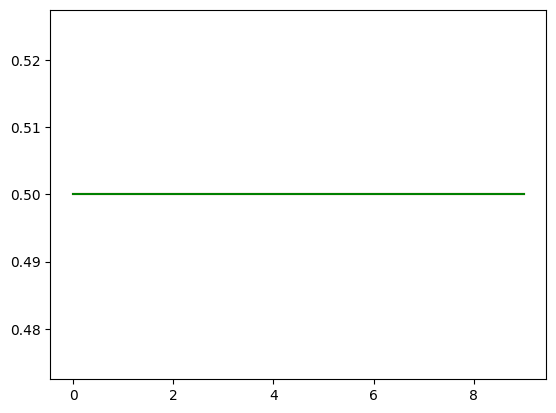

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color='red')
plt.plot(history.history["val_accuracy"],color='green')


#visulizing graph of training accuracy v/s epochs and validation accuracy v/s epochs

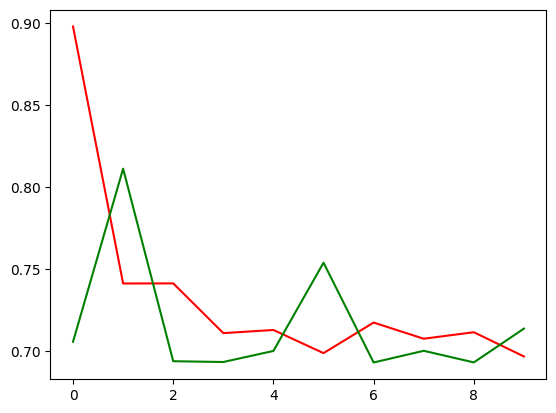

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color='red')
plt.plot(history.history["val_loss"],color='green')

#visulizing graph between training loss v/s epochs and validation loss v/s epochs

# **For Theory,**
* You can refer below blog. This blog is not written by me but it is such a nice and well maintained and well defined blog that capable to teach us how things are work?? I think if this type of content available for this topic then why I should remake it and waste my time. This is my thinking behind this.

https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b